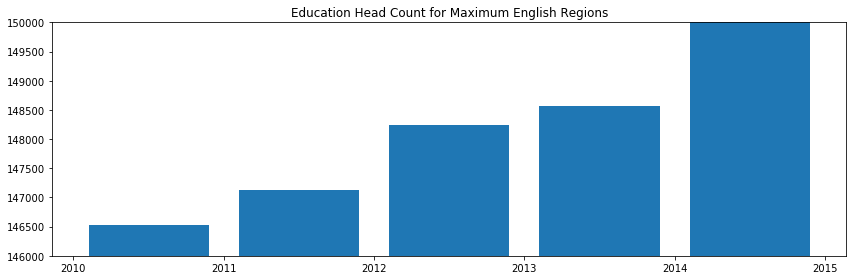

In [2]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
client = MongoClient()
db = client.test
collection = db['EducationHeadCount']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)
head = result['Period_label'].str.replace('/..', '')
head = head.map(lambda x: x.rstrip(' (academic)'))
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 4))

plt.ylim((146000,150000))
ax1.hist(head.astype(int),bins=head.astype(int),weights=result['Maximum_english_regions'].astype(int), histtype='bar', rwidth=0.8)
ax1.set_title('Education Head Count for Maximum English Regions')

fig.tight_layout()
plt.show()